# Assignment objective

We have data from Raleigh, NC, where we recently deployed a flyer program in order to increase public awareness of the possibility of taking a Pagaya loan. You objective is to assess the potency of the flyer program in terms of activation by analyzing production and TU data obtained from the town.


# Basic imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import norm

cs=[ '#FFFF00','#93CAED']

# Data preparation

## Data from TU 

To begin with, upload TUs credit information from the relevant quarter (which is 2018Q3). This data is available in our `s3` path under the name `tu_gen_data2018Q3.parquet`. To get to our `s3` path import `DATA_FILES_PATH` from `pagayapro.paths.data_paths`

In [2]:
from pagayapro.paths.data_paths import DATA_FILES_PATH

read the parquet file from `s3`. Only read the columns ["sequence_num", "credit_score", "listing_term", "int_rate", "loan_amnt", "monthly_pmt", "original_state"]

In [3]:
tu_data= pd.read_parquet(
    os.path.join(DATA_FILES_PATH,"tu_gen_data_2018Q3.parquet"),
                columns = ["sequence_num", "credit_score", 
                           "listing_term", "int_rate" ,
                           "loan_amnt", "monthly_pmt", 
                           "original_state"])

Output the first 5 rows of tu_data

In [4]:
tu_data.head(5)

,sequence_num,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state
id,,,,,,,
adf5219e4cb985352184eb7fa597737e4a9777f7354f7a8a58270da147792561,d0820401b209782dae4284b3dd96b41e08c3e8566fbb33...,814,36.0,7.86,5500.0,172.0,MI
0a0f130443af4c6597bb074942970eaddeb125d398e2cca42175c56befc8a171,2f05cd66cb998e5e55f6f296344b271b2b89b996c7c037...,800,36.0,7.91,20000.0,626.0,NM
4ba9c6a38b650ee06b8b88a48621bd363cdf611e63400c6fc4bbffbd1bf20c47,20bdbfaf0006db032d8a4176add08fd4ef45abfb17c474...,653,36.0,30.51,3674.0,157.0,SD
dae3a344292e07d4b8935a453c37aef01303f21b2f37ccbd1c4408f158533acb,53084498c6bf053a4d1cf309e1b8ec234e503bb1a3dd4e...,623,60.0,23.46,14056.0,400.0,NC
8af2ae2462d012e4d85aa687a16a4f5fb64525928235da43c795f73dc0cadd04,f750c4ecac12ae1c156998ed3dff3f46d2d19f37250074...,627,60.0,25.55,8659.0,257.0,TN


## Activation data 

Your data regarding activation arrives as forms, detailing the loan amount, interest rate offered to the client and whether he or she accepted the offer. These are available on the assignment's `s3` path, which you can import from `pagayapro.path.data_paths` under the name `ASSIGNMENT1_DATA`, in the subdirectory `offers`. 

In [5]:
from pagayapro.paths.data_paths import ASSIGNMENT1_DATA
import glob

Read all files in the subdirectory `offers` of `ASSIGNMENT1_DATA` whose name contains the substring `raleigh`.

In [6]:
raleigh_forms= (
    glob.glob(
        os.path.join(ASSIGNMENT1_DATA,"offers/*raleigh*")
    )
)

how many forms are there?


In [7]:
len(raleigh_forms)

769

Read all the form files and create a table which contains only the last offer given to each borrower. Call this dataframe `raleigh_df`.

In [8]:
li = []
for filename in raleigh_forms:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

raleigh_df = pd.concat(li, axis=0, ignore_index=True)
raleigh_df.head()

,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date
0,743200d3e4cc1f6f860e121294248d611350f257a7bc83...,ec10245656d9d89186fb4e5890082eea989d5967752ce7...,3000.0,17.69,False,2018-01-01
1,e3e32f85cd78bb5002ccdc037c1818029f716e7a47911e...,3dcd131256c103fccb61c75cd79ca97fa2b5e31c4ab03e...,6899.0,12.56,False,2018-01-01
2,3a72ae7a82244f811b37c48f57469b708207004f011163...,06c005c5de6ba445d4c709b84611ac2b8542cd5d37221b...,3800.0,12.97,False,2018-01-01
3,ce770273c28ddb4f8637ae423b582f0b1617e0fe7a4880...,c49b3fce67673a9f82ed4ccaa9f75e668db48e775514fc...,13000.0,5.06,False,2018-01-01
4,7eac15c5019d5101e6434ac34202cc974b044c808958c3...,107a5b2ba3853f80df245d8644af08b74d27af77f14292...,9250.0,10.34,False,2018-01-01


In [9]:
filter_raleigh_df = raleigh_df.sort_values(by='offer_date', ascending=False).groupby('id').first()
filter_raleigh_df

,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date
id,,,,,
0000944c6eb064d675539d8deaff65acd38cecfba22862b4ce639fac845d7981,65529635d01c24822ffe6bd680ea2a0c7d44f49aa88afb...,5000.0,12.30,False,2019-12-02
0003290aea2ca5f7da83d2f32d0c783998906346e998926fb5c96c6923d014b3,6ce06396232ee6df63e905b2d9e5401030570873c7c3ba...,3300.0,24.88,False,2019-01-29
0005ca5ea9f8399dddee878b7c9694d618a9a1b9d0915267a0b0b38eab5f7d05,d29ac15bafd56a1444b1b06265d4c67869350f0dd86b58...,3000.0,12.94,False,2020-01-10
00205f2f999895bde728aebcd83707fa204ec44e203b97bbd7dd3c902c3d2245,6061825c161146555925ce39fb27c935fb5899f39ce94b...,25000.0,13.08,False,2019-07-31
002e86fa45263cfe8429dcaa1b37e8abbf57b596e6f45bd852440787276945cf,f93f7353e36814e67c17ad06878c2c9f5f810286036b9a...,3816.0,33.77,False,2020-11-23
...,...,...,...,...,...
ffce79218a7a102afb66510e5f939eb81dbc5b3ffbc634fb057f34e8b5e82c7b,e11f71aaf03444b6a4f0029fa25dbcdda8e02f9c05b0ef...,5404.0,16.20,False,2019-08-29
ffd3212db59d400a6b3a7716a957815317f5aa45576e5d06d636c9554527f90a,f21721e0500148e8e0782a75f17191a106ed1619a56f6a...,20000.0,7.05,False,2018-04-20
ffd49ce4b7e5256c9a55a39fca8668ce3f736d1c328a16b93a95a683ee146495,ca7edd6b5f76af93700faad1bb44e5272019a34f6738b6...,7393.0,16.29,False,2018-08-10


How many rows are there in your table? How many distict ids?

In [10]:
len(raleigh_df)

13362

In [11]:
len(filter_raleigh_df)

8792

How can you explain the duplicate ids? Sample 5 ids with multiple lines and display them.

A single customer (shown by their ID) has multiple entries because they have recieved multiple offers.
They would only have accepted at most one.

In [12]:
duplicate_ids = list(raleigh_df['id'].value_counts().head().index)

raleigh_df[raleigh_df['id'].isin(duplicate_ids)].sort_values(by = 'id')

,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date
3152,1eb4ee40c274825b55da37d6c98258aa2ddc812c53bc45...,97d5ad51c52c64f544ddea597030e186ec64cc4c953e1a...,14018.0,12.728950,False,2018-07-06
11886,1eb4ee40c274825b55da37d6c98258aa2ddc812c53bc45...,97d5ad51c52c64f544ddea597030e186ec64cc4c953e1a...,14018.0,12.460527,False,2020-06-25
11961,1eb4ee40c274825b55da37d6c98258aa2ddc812c53bc45...,97d5ad51c52c64f544ddea597030e186ec64cc4c953e1a...,14018.0,12.160000,True,2020-07-03
4004,257a3aaed8a78155a06e3f20206e6898dc5bcaab1a073e...,2020b8b40282f07bf7b673f5eb13b3957c383f1e795267...,15000.0,11.201812,False,2018-08-28
4744,257a3aaed8a78155a06e3f20206e6898dc5bcaab1a073e...,2020b8b40282f07bf7b673f5eb13b3957c383f1e795267...,15000.0,7.013405,False,2018-10-16
11151,257a3aaed8a78155a06e3f20206e6898dc5bcaab1a073e...,2020b8b40282f07bf7b673f5eb13b3957c383f1e795267...,15000.0,6.970000,False,2020-04-13
2314,26a5688a75d0762700da2ca243aa9337a7802930010c9d...,7a0f8f94e572eabd35d9ddac77f618130a0bc8f209faef...,10000.0,9.548842,False,2018-05-16
2691,26a5688a75d0762700da2ca243aa9337a7802930010c9d...,7a0f8f94e572eabd35d9ddac77f618130a0bc8f209faef...,10000.0,5.459445,False,2018-06-07
12409,26a5688a75d0762700da2ca243aa9337a7802930010c9d...,7a0f8f94e572eabd35d9ddac77f618130a0bc8f209faef...,10000.0,5.280000,False,2020-08-24
5727,b90940ffe1573669694dd11192e42dd346059083ebbb48...,6c450aa5e1e2f9635864fd3cab813717c8131246ed1671...,5000.0,9.683903,False,2018-12-25


Drop all lines in the dataframe which contain irrelevant information.

In [13]:
full_raleigh_df = raleigh_df
raleigh_df = filter_raleigh_df

What is the average interest rate offered to clients? What is the average among clients who accepted the offer?

In [14]:
print('average interest rate of loans offered:')
raleigh_df['offered_interest_rate'].mean()

average interest rate of loans offered:


15.524284576888082

In [15]:
print('average interest rate of loans accepted:')
raleigh_df[raleigh_df['offer_accepted']==True]['offered_interest_rate'].mean()

average interest rate of loans accepted:


15.307480314960628

Lets verify by check it by the pivot table of mean and count

In [16]:
raleigh_df_pt = raleigh_df.pivot_table(index='offer_accepted',values=['offered_interest_rate'],aggfunc=['mean','count'])

In [17]:
raleigh_df_pt

,mean,count
,offered_interest_rate,offered_interest_rate
offer_accepted,,
False,15.544858,8030
True,15.307480,762


In [18]:
(raleigh_df_pt[( 'mean', 'offered_interest_rate')] * raleigh_df_pt[( 'count', 'offered_interest_rate')]).sum() / raleigh_df_pt[( 'count', 'offered_interest_rate')].sum()

15.524284576888105

What is the percentage of activation in this dataframe?

In [19]:
raleigh_activation_rate = raleigh_df['offer_accepted'].sum()/raleigh_df['offer_accepted'].count()
raleigh_activation_rate*100

8.666969972702457

Enrich your dataframe with additioanl TU features by merging it with the `tu_data` df. Note that the two dataframe share the `id` and `sequence_num` features.

First lets verify the we have no duplicate ids in the tu data

In [20]:
tu_data.index.value_counts()

b7d0ae58f32e99cdc3d3a8201b4dd62cb9b80be4b564750f2b5d49d81328f843    1
8bc7859edc28ea19cd524f4ec8de7b32cb94d7c0e4097127ec1448b4805542ad    1
0db36190cca3861813133eef7a62c7ce503f128b4810900365fd7a6ff8e2f840    1
d118f4a0870d01b99b73dbd7b704253e2a0bac83b97f00ff3bf88acd93829b5c    1
b0d2afa880a76293c0f0817ff34a543923529b98f058932698ea5bc3f328d511    1
                                                                   ..
ef3486c71aee0ddcd1f13999f3e4bb543d2d43535627ca01c48b368a7391e897    1
47278e9e686a05a479604dd2f7303c205f2f8943e057198b2d2a39c397af33e7    1
996dff48d9c1ace7529cf6af4815dcc7dc94590773c59dce799f3fdf00e4a159    1
6f38d1d2e58dd2c61bff1c306a9be21d68eefad130bc1a773067857afbbc43b8    1
2f35761662a81fefbe955ad18c63d342ee274356fbc0d645048caae844dcdb20    1
Name: id, Length: 972723, dtype: int64

Now we can concatenate the data frames

In [21]:
len(raleigh_df)

8792

In [22]:
concat_df = raleigh_df.join(tu_data, how='left', lsuffix='_raleigh', rsuffix='_tu')
concat_df

,sequence_num_raleigh,requested_amount,offered_interest_rate,offer_accepted,offer_date,sequence_num_tu,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state
id,,,,,,,,,,,,
0000944c6eb064d675539d8deaff65acd38cecfba22862b4ce639fac845d7981,65529635d01c24822ffe6bd680ea2a0c7d44f49aa88afb...,5000.0,12.30,False,2019-12-02,65529635d01c24822ffe6bd680ea2a0c7d44f49aa88afb...,791,60.0,12.30,5000.0,112.0,NC
0003290aea2ca5f7da83d2f32d0c783998906346e998926fb5c96c6923d014b3,6ce06396232ee6df63e905b2d9e5401030570873c7c3ba...,3300.0,24.88,False,2019-01-29,6ce06396232ee6df63e905b2d9e5401030570873c7c3ba...,645,36.0,24.88,3300.0,131.0,NC
0005ca5ea9f8399dddee878b7c9694d618a9a1b9d0915267a0b0b38eab5f7d05,d29ac15bafd56a1444b1b06265d4c67869350f0dd86b58...,3000.0,12.94,False,2020-01-10,d29ac15bafd56a1444b1b06265d4c67869350f0dd86b58...,703,36.0,12.94,3000.0,101.0,NC
00205f2f999895bde728aebcd83707fa204ec44e203b97bbd7dd3c902c3d2245,6061825c161146555925ce39fb27c935fb5899f39ce94b...,25000.0,13.08,False,2019-07-31,6061825c161146555925ce39fb27c935fb5899f39ce94b...,692,60.0,13.08,25000.0,570.0,NC
002e86fa45263cfe8429dcaa1b37e8abbf57b596e6f45bd852440787276945cf,f93f7353e36814e67c17ad06878c2c9f5f810286036b9a...,3816.0,33.77,False,2020-11-23,f93f7353e36814e67c17ad06878c2c9f5f810286036b9a...,606,36.0,33.77,3816.0,170.0,NC
...,...,...,...,...,...,...,...,...,...,...,...,...
ffce79218a7a102afb66510e5f939eb81dbc5b3ffbc634fb057f34e8b5e82c7b,e11f71aaf03444b6a4f0029fa25dbcdda8e02f9c05b0ef...,5404.0,16.20,False,2019-08-29,e11f71aaf03444b6a4f0029fa25dbcdda8e02f9c05b0ef...,738,60.0,16.20,5404.0,132.0,NC
ffd3212db59d400a6b3a7716a957815317f5aa45576e5d06d636c9554527f90a,f21721e0500148e8e0782a75f17191a106ed1619a56f6a...,20000.0,7.05,False,2018-04-20,f21721e0500148e8e0782a75f17191a106ed1619a56f6a...,806,36.0,7.05,20000.0,618.0,NC
ffd49ce4b7e5256c9a55a39fca8668ce3f736d1c328a16b93a95a683ee146495,ca7edd6b5f76af93700faad1bb44e5272019a34f6738b6...,7393.0,16.29,False,2018-08-10,ca7edd6b5f76af93700faad1bb44e5272019a34f6738b6...,610,36.0,16.29,7393.0,261.0,NC


Let's verify that any repeated columns are really identical:

In [23]:
concat_df.columns

Index(['sequence_num_raleigh', 'requested_amount', 'offered_interest_rate',
       'offer_accepted', 'offer_date', 'sequence_num_tu', 'credit_score',
       'listing_term', 'int_rate', 'loan_amnt', 'monthly_pmt',
       'original_state'],
      dtype='object')

In [24]:
(concat_df['sequence_num_raleigh']!=concat_df['sequence_num_tu']).sum()

0

In [25]:
(concat_df['requested_amount']!=concat_df['loan_amnt']).sum()

0

In [26]:
(concat_df['offered_interest_rate']!=concat_df['int_rate']).sum() # & (concat_df['offer_accepted'] == T))

812

Let's examine the unmatched interest rates. We can see that they still look identitcal.

In [27]:
concat_df[(concat_df['offered_interest_rate']!=concat_df['int_rate'])][['offered_interest_rate','offer_accepted','int_rate']]

,offered_interest_rate,offer_accepted,int_rate
id,,,
005a2cc92c7aef2203e10f66bac6b9f76d50de34216b51bc83faea6c23c011a3,10.87,False,10.87
0080411740a817e8418a89873727b6e9bbad73a29b1c1c554c91c4ba6b28ae75,18.74,False,18.74
008fc5384b9d37dd7bf66ee98ec653abbb9a53c8e21b8eddddb5ee778d720fef,18.49,False,18.49
00976394957692e0a1c8ad65818e050e250bb2d265aec1dcb09614f34e012915,20.33,False,20.33
00a1298792cc15c1aaf7415201c10c9d530c1c3237a0beb6fdc07aabef741105,18.08,False,18.08
...,...,...,...
fef88a535978e54d11d2201145bb93db6a6ae7a45474d1ed98bcb064678e758d,9.20,False,9.20
ff1687f27fcbc65dc99c4ec32dc2c34b331c148487fa92f5039aeb43a9cc37be,10.70,False,10.70
ffc3113bcaeacd7ce2aa394d5a0aa655cc02373defd4a955ca911e2ec27ce0e4,14.45,False,14.45


In [28]:
np.isclose(concat_df['offered_interest_rate'],concat_df['int_rate']).sum()

8792

We found the following
* sequence numbers: identical
* loan amount: identical
* interest rates: initially, there seemed to be differences, but using 'np.isclose' we see that they are in fact insignificant differences

Therefore we will remove the three columns.

In [29]:
concat_df.drop(['sequence_num_tu','int_rate','loan_amnt'],inplace = True,axis = 1)

In [30]:
concat_df.head()

,sequence_num_raleigh,requested_amount,offered_interest_rate,offer_accepted,offer_date,credit_score,listing_term,monthly_pmt,original_state
id,,,,,,,,,
0000944c6eb064d675539d8deaff65acd38cecfba22862b4ce639fac845d7981,65529635d01c24822ffe6bd680ea2a0c7d44f49aa88afb...,5000.0,12.30,False,2019-12-02,791,60.0,112.0,NC
0003290aea2ca5f7da83d2f32d0c783998906346e998926fb5c96c6923d014b3,6ce06396232ee6df63e905b2d9e5401030570873c7c3ba...,3300.0,24.88,False,2019-01-29,645,36.0,131.0,NC
0005ca5ea9f8399dddee878b7c9694d618a9a1b9d0915267a0b0b38eab5f7d05,d29ac15bafd56a1444b1b06265d4c67869350f0dd86b58...,3000.0,12.94,False,2020-01-10,703,36.0,101.0,NC
00205f2f999895bde728aebcd83707fa204ec44e203b97bbd7dd3c902c3d2245,6061825c161146555925ce39fb27c935fb5899f39ce94b...,25000.0,13.08,False,2019-07-31,692,60.0,570.0,NC
002e86fa45263cfe8429dcaa1b37e8abbf57b596e6f45bd852440787276945cf,f93f7353e36814e67c17ad06878c2c9f5f810286036b9a...,3816.0,33.77,False,2020-11-23,606,36.0,170.0,NC


What is the average credit score of the clients? What is the average among clients who accepted the offer?

In [31]:
print('average credit score of clients:')
concat_df['credit_score'].mean()

average credit score of clients:


689.821542311192

In [32]:
print('average credit score of clients who accepted the offer:')
concat_df[concat_df['offer_accepted']==True]['credit_score'].mean()

average credit score of clients who accepted the offer:


702.5446194225722

# Validations

Before we embark on a statistical test, let's do some validations to make sure that the Raleigh sample is not somehow distinct from the general population. Our random sample from the general population is the TU data.

Create a histogram to describe the distribution of requested loan amounts in Raleigh and in the general population. Do the distributions look similar? (A good rule-of-thumb for the number of bins to use is the square-root of the number of unique value.)

In [33]:
bins_raleigh = int((raleigh_df['requested_amount'].unique().shape[0]) ** (1/2))
bins_tu = int((tu_data['loan_amnt'].unique().shape[0]) ** (1/2))
print(bins_raleigh)
print(bins_tu)

46
165


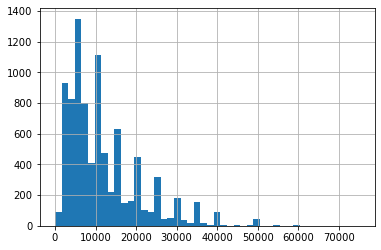

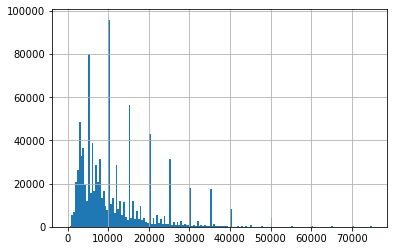

In [34]:
raleigh_df['requested_amount'].hist(bins=bins_raleigh, range = (0,75000))
plt.show()
tu_data['loan_amnt'].hist(bins=bins_tu, range = (0,75000))
plt.show()

Using the square root of the number of unique values, the distributions look similar. However, when we choose 50 bins to tu_data, we see the similar distribution much more clearly.

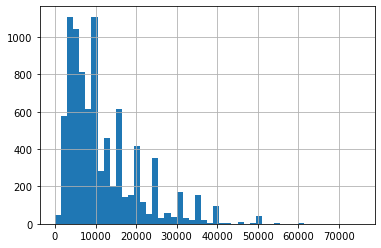

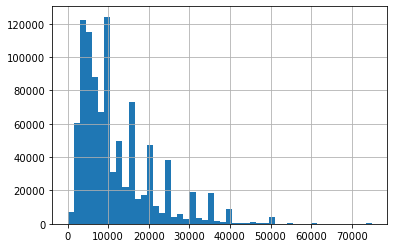

In [35]:
raleigh_df['requested_amount'].hist(bins=50, range = (0,75000))
plt.show()
tu_data['loan_amnt'].hist(bins=50, range = (0,75000))
plt.show()

Lets see the hist of the log values

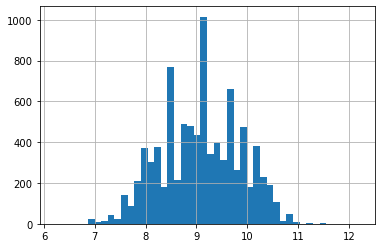

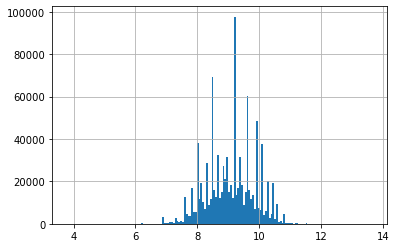

In [36]:
np.log(raleigh_df['requested_amount']).hist(bins=bins_raleigh)
plt.show()
np.log(tu_data['loan_amnt']).hist(bins=bins_tu)
plt.show()

We can see that although the TU data has more outliers (before we restricted the range), that the two distributions do look similar and therefore it makes sense that our random sample is representative.

Describe the loan amount distribution using `sns.distplot` in the Raleigh dataframe and in TU.

In [37]:
import warnings
warnings.filterwarnings("ignore")

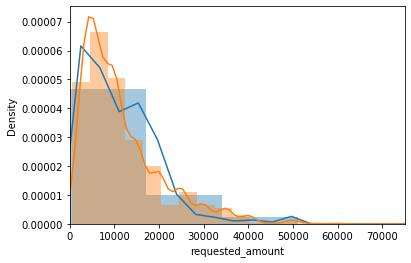

In [38]:
sns.distplot((tu_data['loan_amnt']))
ax = sns.distplot((raleigh_df['requested_amount']))
ax.set_xlim(0,75000);

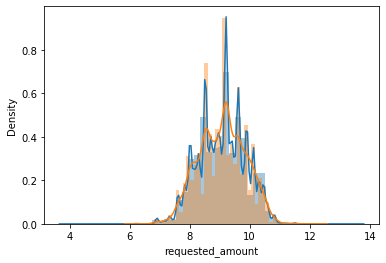

In [39]:
sns.distplot(np.log(tu_data['loan_amnt']))
sns.distplot(np.log(raleigh_df['requested_amount']));

The distplot of the log values of loan amounts also shows a similar distribution.

We also want to verify that the offered interest rate in Raleigh seem similar to those in the general population. 
Create a histogram to describe the distribution of offered interest rates in Raleigh and interest rates in the general population. Do the distributions look similar?

Describe the interest rate distribution using `sns.distplot` in the Raleigh dataframe and in TU.

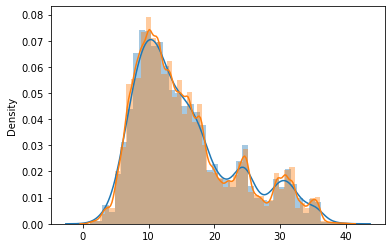

In [40]:
sns.distplot(raleigh_df['offered_interest_rate'].to_numpy())
sns.distplot(tu_data['int_rate'].to_numpy());

The distplot of the log values of the interest rates also shows a similar distribution.

Additionally, we want to make sure the credit scores are not visibly different in Raleigh from the general population, as this might mean that the data we obtained from the town might not be representative of the general popuation.

Create a histogram to describe the distribution of credit scores in the Raleigh sample and in the general population. Do the distributions look similar? How many bins did you use?

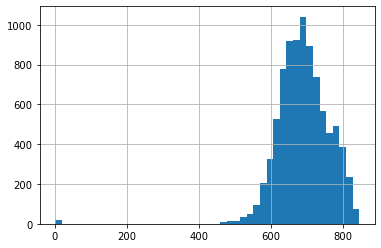

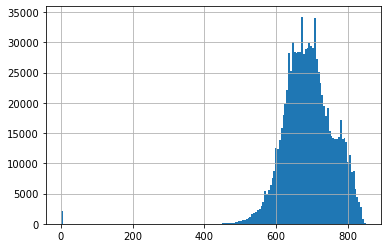

In [41]:
concat_df['credit_score'].hist(bins=bins_raleigh)
plt.show()
tu_data['credit_score'].hist(bins=bins_tu)
plt.show()

Describe the credit score distribution using `sns.distplot`  in the Raleigh dataframe and in TU.

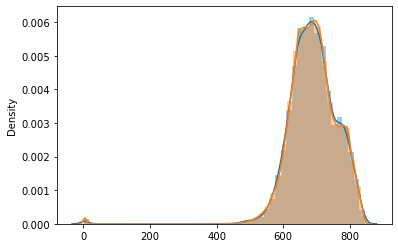

In [42]:
sns.distplot(concat_df['credit_score'].to_numpy())
sns.distplot(tu_data['credit_score'].to_numpy());

We can see clearly that the distribution of Raleigh credit scores is similar to the general population. We can draw conclusions from one to the other!

Finally, check whether the loans in both datasets have similar distributions of term (i.e. the amount of months the borrower takes the loan for). What values of term exist in the data?

In [43]:
concat_df_value_counts = concat_df['listing_term'].value_counts()
concat_df_value_counts

36.0    4896
60.0    3896
Name: listing_term, dtype: int64

Lets take a look on the percentages

In [44]:
concat_df_value_counts / len(concat_df)

36.0    0.55687
60.0    0.44313
Name: listing_term, dtype: float64

In [45]:
tu_value_counts = tu_data['listing_term'].value_counts()
tu_value_counts

36.0    542102
60.0    430621
Name: listing_term, dtype: int64

In [46]:
tu_value_counts / len(tu_data)

36.0    0.557304
60.0    0.442696
Name: listing_term, dtype: float64

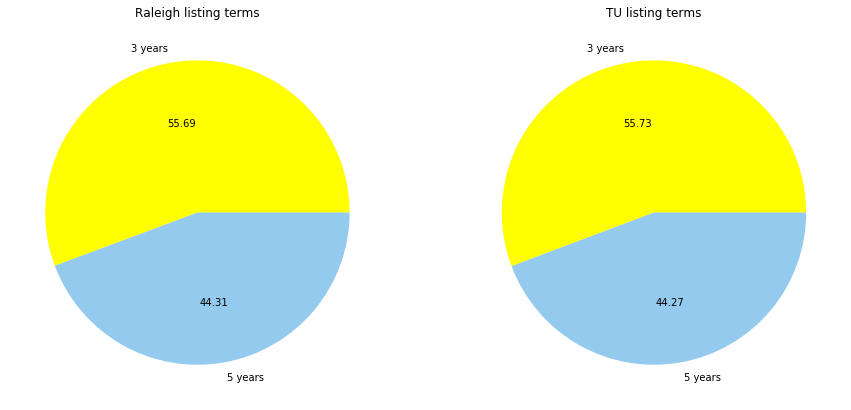

In [47]:
ax, fig = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1, 2, 1)
ratios = concat_df[['listing_term']].value_counts()/len(concat_df['listing_term'])
plt.pie(ratios,labels = ['3 years','5 years'], autopct='%.2f', colors = cs)
plt.title('Raleigh listing terms')
plt.subplot(1, 2, 2)
ratios = tu_data[['listing_term']].value_counts()/len(tu_data['listing_term'])
plt.pie(ratios,labels = ['3 years','5 years'], autopct='%.2f', colors = cs)
plt.title('TU listing terms');

We can see that we have 2 values of listing_term:

* 36 - this makes up 56% of both data sets
* 60 - this makes up 44% of both data sets

This make sense because the offers are 3 years or 5 years

From these comparisons, we can clearly see that the Raleigh sample from the population is representative of the wider populatino.

# CLT in action

One more thing before we start the test. Our goal is to check whether, for which we'll run some statistical test (you probably already know which) which checks if something belongs to a noraml distribution with some mean and some variance. But... is activation normally distributed in the Raliegh sample? 

#+2 points if you answer without plotting

Activation in the Raleigh sample is not distributed normally. If we were to draw a frequency chart, we would have two columns, at 0 and 1.
Furthermore, it is a discrete distribution and not continuous.

It is close to a bernoulli distribution - where we have success or failure. We say 'close' because we will assume a constant probability of success/failure.

However, if we take many samples and their mean proportions of activation, the distribution of these sample proportions will be normal, due to the central limit theorem.

The reason why we can assume normality is because we're checking averages of samples and we're relying on the Central Limit Theorem. We won't prove the theorem, but let's test it for a bit. 

Write a function which takes a pandas series S and a natural number n and creates a series of means of samples (with replacement) of n entries from S. Decide for yourself on the length of the output series. You can also use a different data structure if you find it more suitable as the output.

In [48]:
def sample_means_generation(S,sample_size):
    sample_means = []
    for i in range(500):
        sample_indices = np.random.randint(len(S),size=sample_size)
        sample = S.iloc[sample_indices]
        sample_mean = sample.mean()
        sample_means.append(sample_mean)
    return pd.Series(sample_means, name='sample_mean')

In [49]:
sample_means_generation(raleigh_df['offer_accepted'], 30).head()

0    0.133333
1    0.000000
2    0.166667
3    0.133333
4    0.066667
Name: sample_mean, dtype: float64

Optionally- also create a function which, given the same input as above, plots a histogram of the series of means, and also indicates the mean of this series.

In [50]:
def histogram_of_sample_means(S,sample_size):
    sample_means = sample_means_generation(S,sample_size)
    mean_of_sample_means = sample_means.mean()
    sample_means.hist()
    return mean_of_sample_means*100

8.625799999999998


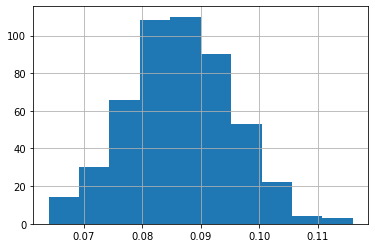

In [51]:
print(histogram_of_sample_means(raleigh_df['offer_accepted'], 1000))

Generate plots of the series of means of activation in Raleigh and in TU for n = 1, 2, 5, 10, 100, 1000 and 1e6, and indicate their means. Does the distribution approach a normal distribution as $n\to\infty$ in your opinion?

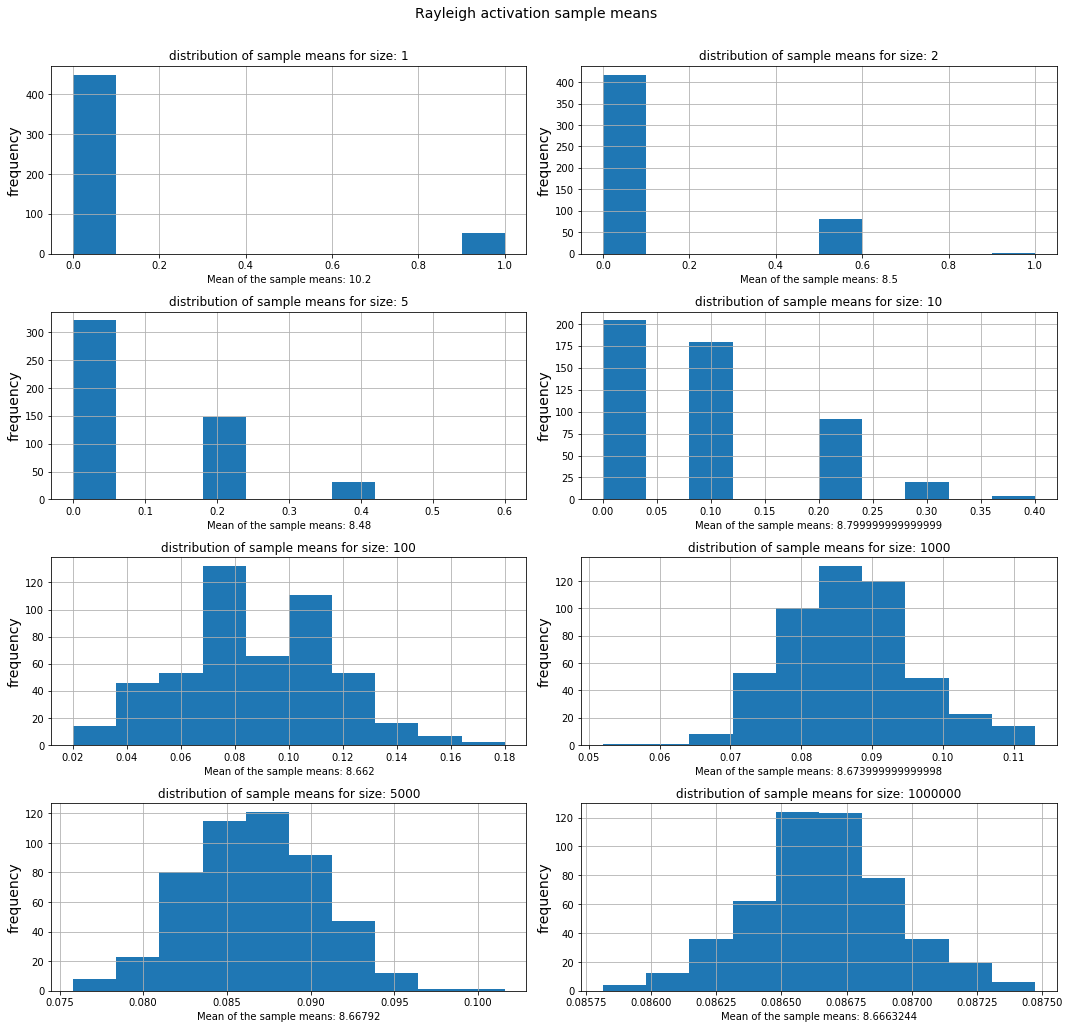

In [52]:
ax, fig = plt.subplots(4,2,figsize=(15,15))
plt.suptitle("Rayleigh activation sample means", fontsize=14)
i=1
for n in np.array([1, 2, 5, 10, 100, 1000,5000, 1*(10**6)]):
    #plt.suptitle("loan_amnt distribution")
    plt.subplot(4,2,i)
    i+=1
    mean = histogram_of_sample_means(raleigh_df['offer_accepted'],n)
    plt.xlabel(f"Mean of the sample means: {mean}")
    plt.ylabel('frequency', fontsize=14)
    plt.title(f'distribution of sample means for size: {n}')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

We can see that the distribution of the sample mean variable approaches a normal distriution as n->infinity.

Now that your fuction is ready, it's time to make it part of our infrastucture:
* Inside the `pagayapro` repo, create a branch called `feature/{your_user_name}/clt_tester/`.
* Create a file called `clt.py` inside `~/pagayapro/users/{user_name}/assignment1/` 
* Copy the two finctions you just created into the file.
* Push your file to `main`, open a PR and ask your mentor to review it. Once approved, rebase and merge.

# Statistical test 

As mentioned in the Notion doc, the activation in Raleigh before deployment was measured at 6.85%. In this section, you will run a test to check whether the activation in Raleigh is indeed different following the flyer program. 

In [53]:
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.power import zt_ind_solve_power
from scipy.stats import norm

Run a statistical test to check whether the current activation rate in Raleigh is different from 6.85%:
1. What are your hypotheses?
2. Setting your confidence level at 95%, what is the probability of an error of type I in your test? What is the probability of a type II error? What is the power of your test?
3. Is the sample mean significantly different from the past value of 6.85?
4. Interpret your results. Can you declare the program as successful in increasing activation (what is the probability of wrongfully declaring it successful)?
5. Are there any other possible explanations for the change in activation that you observed? Discuss the possible drawbacks of our current test.

Use `proportions_ztestz` from `statsmodels.stats.proportion` in order to perform the test. Are your results significant?

**1. Hypotheses**

$H_0$: the activvation rate in the population has not changed: $p = 6.85%$

$H_1$: the activation rate in the population has changed: $p \neq 6.85%$

Where $p$ is the population proportion.

While we have reason to believe that the population proportion has increased due to our intervention, it is possible that it fell due to poor company image resulting from the intervention. 

In [54]:
raleigh_true = concat_df['offer_accepted'].sum()
raleigh_size = concat_df['offer_accepted'].count()

The t-distribution approaches the z-distribution as n increases.

In [55]:
result = proportions_ztest(count = raleigh_true, nobs = raleigh_size, value=0.0685, alternative='two-sided', prop_var=False)
print(result)
p_value = result[1]
p_value

(6.055416376341698, 1.4005491742963572e-09)


1.4005491742963572e-09

In [56]:
raleigh_activation_rate*100

8.666969972702457

**2. Type I and Type II errors**

Type I error: (reject the null hypothesis when it is true)

Probability of a type I error: 5%

Type II error: (fail to reject the null hypothesis when it is false)

Probability of a type II error: shown below



In [57]:
phat_std = np.sqrt(raleigh_activation_rate*(1-raleigh_activation_rate)/raleigh_size)
z_value = norm.ppf(0.975)
print('phat_std',phat_std)
print('z_value',z_value)

phat_std 0.003000569836619815
z_value 1.959963984540054


In [58]:
phat_mean_h0 = 0.0685
upper = z_value*phat_std+phat_mean_h0
lower = -z_value*phat_std+phat_mean_h0
print('upper',upper)
print('lower',lower)

upper 0.07438100881287207
lower 0.06261899118712794


In [59]:
phat_mean_h1 = raleigh_true/raleigh_size
phat_mean_h1

0.08666969972702457

In [60]:
norm(phat_mean_h1, phat_std).cdf(upper) - norm(phat_mean_h1, phat_std).cdf(lower)

2.1067240460960517e-05

Thus, the probability of a type II error here is $\beta = 2.1067240460960517\cdot10^{-05}$.

And the power of the test is $1-\beta = 0.0.9999789$

Note that here we have used 0.08667 as the assumed 'new' activation rate.


**3. Is the sample mean significantly different from the past value of 6.85?** 

Our sample proportion of 8.67% has a statistically significant difference compared to our past value of 6.85%. The explanation is given in 4. below.

**4. Interpreting results**

We see that the p value for this ztest is $1.4005\cdot10^{-09}$, which is close to zero. It is smaller than our 5% level of significance.

Therefore at the 5% level of significance, we reject the null hypothesis. This supports the proposal that the flyers did lead to an increase in activation rate.

The probability of wrongfully declaring our program as succesful is the probability of a type I error, which is 5%.

Therefore, we do not declare the program as succesful, however, our analysis strongly supports this conclusion. More research should be done.

Do you see any possible problems in your methodology? What other factors can explain the change in activation, if such a change exists?

**5. Possible problems**

Our result of 8.67% could have resulted from other factors. This is not a controlled blind experiment.

a) Economic factors. Perhaps the greater economy worsened and therefore people decided to take on more loans. Perhaps the area of Raleigh is undergoing hardship.

b) Timing factors. If we didn't compare parallel periods, then people might want to take out loans at different times of the year (e.g. Christmas / Summer / after tax)

c) Social factors. e.g. COVID

d) Market factors. If there is less competition in the market, people might be taking loans from us at an increased rate.

e) Internal factors. Were the conditions of our offerings to clients the same as when we had an activation rate of 6.85%?

Drawback for our test:

a) We are only testing Raleigh, this is not a random sample rather a specific population that we have chosen.

b) We only looked for a change in the Raleigh data and did not use a 'control group'. If we had compared to another location at the same time, this could have helped control for example for broader economic conditions.

# A/b test

In order to isolate temporal and environmental effects on activation, we'll run an a/b test, comparing the activation rate in Raleigh to that of Lubbock, TX, another town in which Pagaya operates without a flyer program. 

The activation forms for Lubbock also appear in the `offers` subdirectory of the `ASSIGNMENT1_DATA` folder. Read all files from this folder whose name contains the substring 'lubbock', and create a dataframe of final offers called `lubbock_df`, drop unnecessary rows from it, and enrich it with TU features.

In [61]:
lubbock_forms = (
    glob.glob(
        os.path.join(ASSIGNMENT1_DATA,"offers/*lubbock*")
    )
)
len(lubbock_forms)

769

In [62]:
li = []
for filename in lubbock_forms:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

lubbock_df = pd.concat(li, axis=0, ignore_index=True)
lubbock_df.head()

,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date
0,64796e2ad491e63b299894ddeabb5493e38b7b69770875...,5faf5b8cabb6636e1932f47b51c41e1b12324087fc2e27...,3258.0,17.58,False,2018-01-01
1,38d1be6da80ad94e7a2d226dbe070696c985613dd00f26...,e9d0ce908c56985675d71e793c06b5b6536afd3ba03d86...,16000.0,10.00,False,2018-01-01
2,c751b91bf7b5c2655d7ea397e5a03cbccb74513ff527e4...,f8b6f3cb44cfbb44ad3fa12e6758566a38ef13bbd822bd...,5000.0,18.09,True,2018-01-01
3,ed81efb2125c12ae73c92b36dad9f050c33f3ba3d98b42...,3aad64fa40af5bce4d473f7a38a360de1a2b6dc2b0284d...,9149.0,10.13,False,2018-01-01
4,fb9780f1d54cf106cc5d371a7e2436e586759fb25c9bb6...,a7bf579d73703d66fe7481fe9b2d3c0061171ed87a718b...,3500.0,9.42,False,2018-01-01


In [63]:
lubbock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17177 entries, 0 to 17176
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     17177 non-null  object 
 1   sequence_num           17177 non-null  object 
 2   requested_amount       17177 non-null  float64
 3   offered_interest_rate  17177 non-null  float64
 4   offer_accepted         17177 non-null  bool   
 5   offer_date             17177 non-null  object 
dtypes: bool(1), float64(2), object(3)
memory usage: 687.9+ KB


In [64]:
filter_lubbock_df = lubbock_df.sort_values(by='offer_date', ascending=False).groupby('id').first()
filter_lubbock_df

,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date
id,,,,,
00081387dcef0fab60c7f9f94669cc6df140531c9e0a55c0e98b55dc5aef08d6,35357872fbcfec327a4c7665f08a98f0dc55eb19969f36...,4070.0,8.24,False,2020-07-10
00090fdbe1fc33bf53dda546318c248cb6fe4299ad39dd9db2abd4c32ed2e152,6c98c998cb4bd242edbd55164eeed3927372264f8395b8...,5550.0,16.68,False,2020-06-02
000aa5e29eadd0bd7e2c9649d0ed986af4848895b6a4fa7883c67dd56b5b75ac,921cda1c86bc82347ea8168a894918f8ae857cdbbdb9a5...,25000.0,7.18,False,2019-06-19
001046cb99ae36567910bdd6fd907622cdc8aefb1689d66339fcb59353be46e2,0637e25695fcabdcec43d21364397793a169bd8b6977ed...,20000.0,6.68,False,2018-02-20
00176f09e7f3c4c864098d84a1f07e632fcce67f4d8d1b7ae08aabd5961227f3,1448249d369054a06a82acb4003d3daee61574935da0a8...,10000.0,8.99,False,2019-09-27
...,...,...,...,...,...
ffd1f19c3e14b4ba2c064010847e0c323bdc392af84a945ee91b0e9f58c16d4d,365577da66c826c4c6730cae6e46000806891e8a42a69e...,3000.0,18.36,False,2019-04-17
ffe0a054b953d3e19b166077d839dbc2807317446cbb47f0b49f764ce5cb23b9,fed3407c137d244faf74510485b480a6c6fc852b689bef...,5000.0,29.90,False,2020-05-15
ffe1669cce5b7b2f1cb43f6f44a0ab1a4e2ab73856f6d552d29f551daf460547,d88f12e6b0ba3b34cc1512216eb1694ac8e5386d681cbc...,12000.0,12.83,False,2019-10-30


In [65]:
filter_lubbock_df.isna().sum()

sequence_num             0
requested_amount         0
offered_interest_rate    0
offer_accepted           0
offer_date               0
dtype: int64

In [66]:
full_lubbock_df = lubbock_df
lubbock_df = filter_lubbock_df

In [67]:
concat_lubbock = lubbock_df.join(tu_data, how='left', lsuffix='_lubbock', rsuffix='_tu')
concat_lubbock

,sequence_num_lubbock,requested_amount,offered_interest_rate,offer_accepted,offer_date,sequence_num_tu,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state
id,,,,,,,,,,,,
00081387dcef0fab60c7f9f94669cc6df140531c9e0a55c0e98b55dc5aef08d6,35357872fbcfec327a4c7665f08a98f0dc55eb19969f36...,4070.0,8.24,False,2020-07-10,35357872fbcfec327a4c7665f08a98f0dc55eb19969f36...,735,36.0,8.24,4070.0,128.0,TX
00090fdbe1fc33bf53dda546318c248cb6fe4299ad39dd9db2abd4c32ed2e152,6c98c998cb4bd242edbd55164eeed3927372264f8395b8...,5550.0,16.68,False,2020-06-02,6c98c998cb4bd242edbd55164eeed3927372264f8395b8...,636,36.0,16.68,5550.0,197.0,TX
000aa5e29eadd0bd7e2c9649d0ed986af4848895b6a4fa7883c67dd56b5b75ac,921cda1c86bc82347ea8168a894918f8ae857cdbbdb9a5...,25000.0,7.18,False,2019-06-19,921cda1c86bc82347ea8168a894918f8ae857cdbbdb9a5...,664,36.0,7.18,25000.0,774.0,TX
001046cb99ae36567910bdd6fd907622cdc8aefb1689d66339fcb59353be46e2,0637e25695fcabdcec43d21364397793a169bd8b6977ed...,20000.0,6.68,False,2018-02-20,0637e25695fcabdcec43d21364397793a169bd8b6977ed...,819,60.0,6.68,20000.0,393.0,TX
00176f09e7f3c4c864098d84a1f07e632fcce67f4d8d1b7ae08aabd5961227f3,1448249d369054a06a82acb4003d3daee61574935da0a8...,10000.0,8.99,False,2019-09-27,1448249d369054a06a82acb4003d3daee61574935da0a8...,780,36.0,8.99,10000.0,318.0,TX
...,...,...,...,...,...,...,...,...,...,...,...,...
ffd1f19c3e14b4ba2c064010847e0c323bdc392af84a945ee91b0e9f58c16d4d,365577da66c826c4c6730cae6e46000806891e8a42a69e...,3000.0,18.36,False,2019-04-17,365577da66c826c4c6730cae6e46000806891e8a42a69e...,684,36.0,18.36,3000.0,109.0,TX
ffe0a054b953d3e19b166077d839dbc2807317446cbb47f0b49f764ce5cb23b9,fed3407c137d244faf74510485b480a6c6fc852b689bef...,5000.0,29.90,False,2020-05-15,fed3407c137d244faf74510485b480a6c6fc852b689bef...,625,36.0,29.90,5000.0,212.0,TX
ffe1669cce5b7b2f1cb43f6f44a0ab1a4e2ab73856f6d552d29f551daf460547,d88f12e6b0ba3b34cc1512216eb1694ac8e5386d681cbc...,12000.0,12.83,False,2019-10-30,d88f12e6b0ba3b34cc1512216eb1694ac8e5386d681cbc...,671,60.0,12.83,12000.0,272.0,TX


In [68]:
print((concat_lubbock['sequence_num_lubbock']!=concat_lubbock['sequence_num_tu']).sum())
print((concat_lubbock['requested_amount']!=concat_lubbock['loan_amnt']).sum())
print(np.allclose(concat_lubbock['offered_interest_rate'],concat_lubbock['int_rate']))

0
0
True


We have used the same checks as above to test identical nature of columns. We will now drop the unecessary columns.

In [69]:
concat_lubbock.drop(['sequence_num_tu','int_rate','loan_amnt'],inplace = True,axis = 1)

In [70]:
concat_lubbock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11320 entries, 00081387dcef0fab60c7f9f94669cc6df140531c9e0a55c0e98b55dc5aef08d6 to fffad2969fd07cce2e6feda2b91c16364d6884c417e05a4e10e279d14a520641
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sequence_num_lubbock   11320 non-null  object 
 1   requested_amount       11320 non-null  float64
 2   offered_interest_rate  11320 non-null  float64
 3   offer_accepted         11320 non-null  bool   
 4   offer_date             11320 non-null  object 
 5   credit_score           11320 non-null  int16  
 6   listing_term           11320 non-null  float64
 7   monthly_pmt            11320 non-null  float64
 8   original_state         11320 non-null  object 
dtypes: bool(1), float64(4), int16(1), object(3)
memory usage: 998.7+ KB


What is the average interest rate in Lubbock? What is it among accepting borrowers?

In [71]:
print('average interest rate of loans offered in Lubbock:')
print(concat_lubbock['offered_interest_rate'].mean())

print('average interest rate of loans accepted in Lubbock:')
print(concat_lubbock[concat_lubbock['offer_accepted']==True]['offered_interest_rate'].mean())


average interest rate of loans offered in Lubbock:
15.505397526501767
average interest rate of loans accepted in Lubbock:
13.553895131086144


What is the average credit score in Lubbock? What is it among accepting borrowers?

In [72]:
print('average credit score of clients in Lubbock who accepted the offer:')
print(concat_lubbock[concat_lubbock['offer_accepted']==True]['credit_score'].mean())
print('average credit score of all clients in Lubbock:')
print(concat_lubbock['credit_score'].mean())

average credit score of clients in Lubbock who accepted the offer:
730.5337078651686
average credit score of all clients in Lubbock:
690.0338339222615


What is the rate of activation in Lubbock?

In [73]:
lubbock_activation = concat_lubbock['offer_accepted'].sum()/concat_lubbock['offer_accepted'].count()
lubbock_activation*100

4.717314487632509

## Caution about a/b test 

Note that this is not a classical a/b test. Usually, in such a test, one creates two random subgroups from the general population and applies a manipulation to one of them in order to see if the manipulation had an effect. However, in this case, it is very complicated to isolate a random subgroup from any population and deploy the flyer program only on it.
Thus, due to production limitation, we have to make do with what we got.

In order to justify the use of an a/b test for this situation, we should at least verify that the borrower population in Lubbock and Raleigh seem as though they were randomly selected from the general population. We have actually already checked it for Raleigh above. Add TU features to the loan amount, interest rate, credit score and term comparisons and see if there any major differences between the three populations (Lubbock, Raleigh and TU).

Loan amount

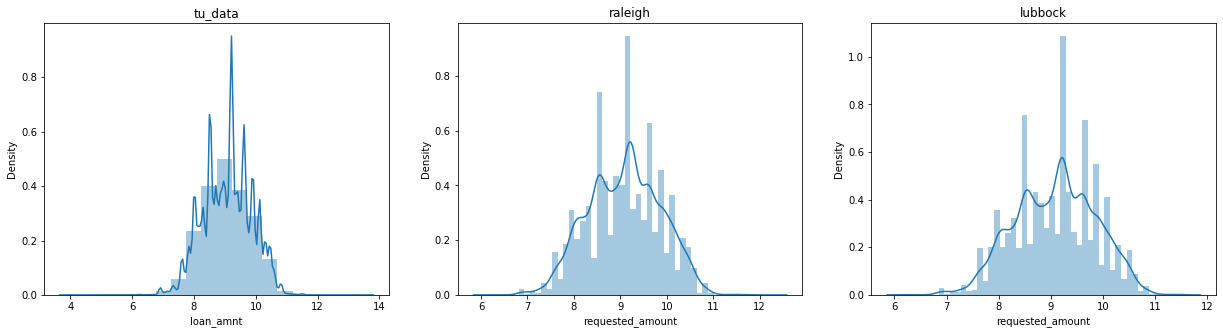

In [74]:
ax, fig = plt.subplots(1,3,figsize=(21,5))
plt.subplot(1, 3, 1)
plt.title('tu_data')
sns.distplot(np.log(tu_data['loan_amnt']), bins = 20)
plt.subplot(1, 3, 2)
plt.title('raleigh')
sns.distplot(np.log(raleigh_df['requested_amount']), bins = 50)
plt.subplot(1, 3, 3)
plt.title('lubbock')
sns.distplot(np.log(concat_lubbock['requested_amount']), bins = 50);

Interest rate

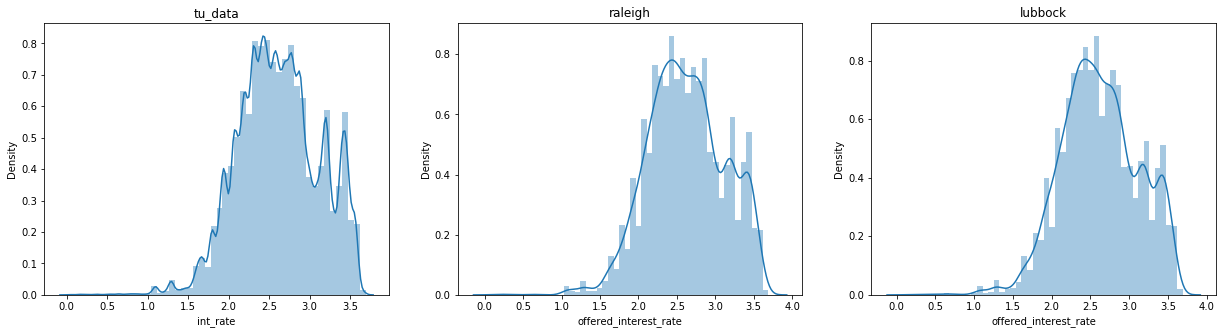

In [75]:
ax, fig = plt.subplots(1,3,figsize=(21,5))
plt.subplot(1, 3, 1)
plt.title('tu_data')
sns.distplot(np.log(tu_data['int_rate']))
plt.subplot(1, 3, 2)
plt.title('raleigh')
sns.distplot(np.log(raleigh_df['offered_interest_rate']))
plt.subplot(1, 3, 3)
plt.title('lubbock')
sns.distplot(np.log(concat_lubbock['offered_interest_rate']));

Credit score

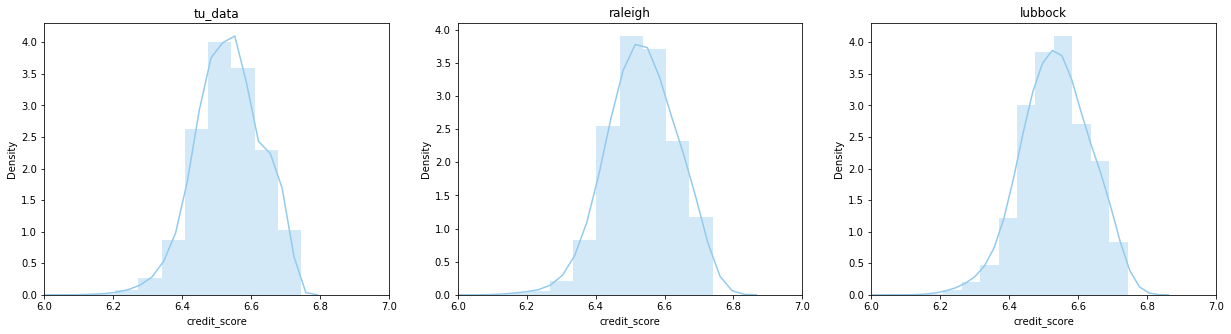

In [76]:
ax, fig = plt.subplots(1,3,figsize=(21,5))
plt.subplot(1, 3, 1)
plt.title('tu_data')
ax = sns.distplot(np.log(tu_data['credit_score']), bins = 100,color=cs[1])
ax.set_xlim(6,7)
plt.subplot(1, 3, 2)
plt.title('raleigh')
ax = sns.distplot(np.log(concat_df['credit_score']), bins = 100,color=cs[1])
ax.set_xlim(6,7)
plt.subplot(1, 3, 3)
plt.title('lubbock')
ax = sns.distplot(np.log(concat_lubbock['credit_score']), bins = 100,color=cs[1])
ax.set_xlim(6,7);

Term comparisons

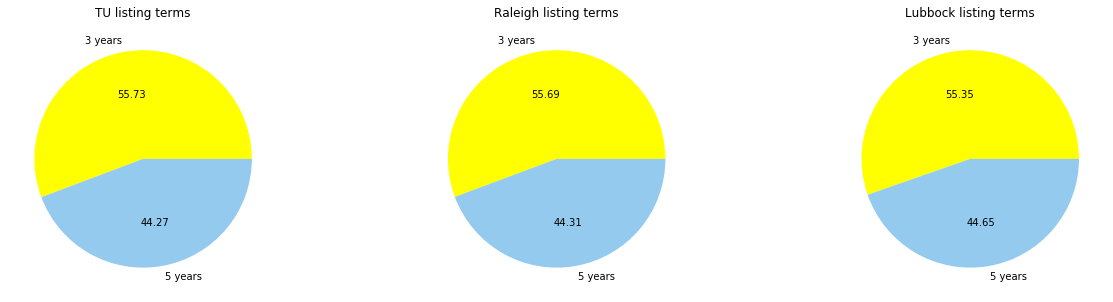

In [77]:
ax, fig = plt.subplots(1,3,figsize=(21,5))
plt.subplot(1, 3, 1)
ratios = tu_data[['listing_term']].value_counts()/len(tu_data['listing_term'])
plt.pie(ratios,labels = ['3 years','5 years'], autopct='%.2f',colors=cs)
plt.title('TU listing terms')
plt.subplot(1, 3, 2)
ratios = concat_df[['listing_term']].value_counts()/len(concat_df['listing_term'])
plt.pie(ratios,labels = ['3 years','5 years'], autopct='%.2f',colors=cs)
plt.title('Raleigh listing terms')
plt.subplot(1, 3, 3)
ratios = concat_lubbock[['listing_term']].value_counts()/len(concat_lubbock['listing_term'])
plt.pie(ratios,labels = ['3 years','5 years'], autopct='%.2f',colors=cs)
plt.title('Lubbock listing terms');

We can see that the distribution of each of these features is similar for each category.

Thus, comparing them using A/B testing is reasonable.

## Performing the test

Use the function you created in the file `clt.py` to plot the series of means of activation in Raleigh and Lubbock for samples of size n= 1, 10, 1000 and 1e6, and compare the means of the two histograms. To they seem to converge to the same value?

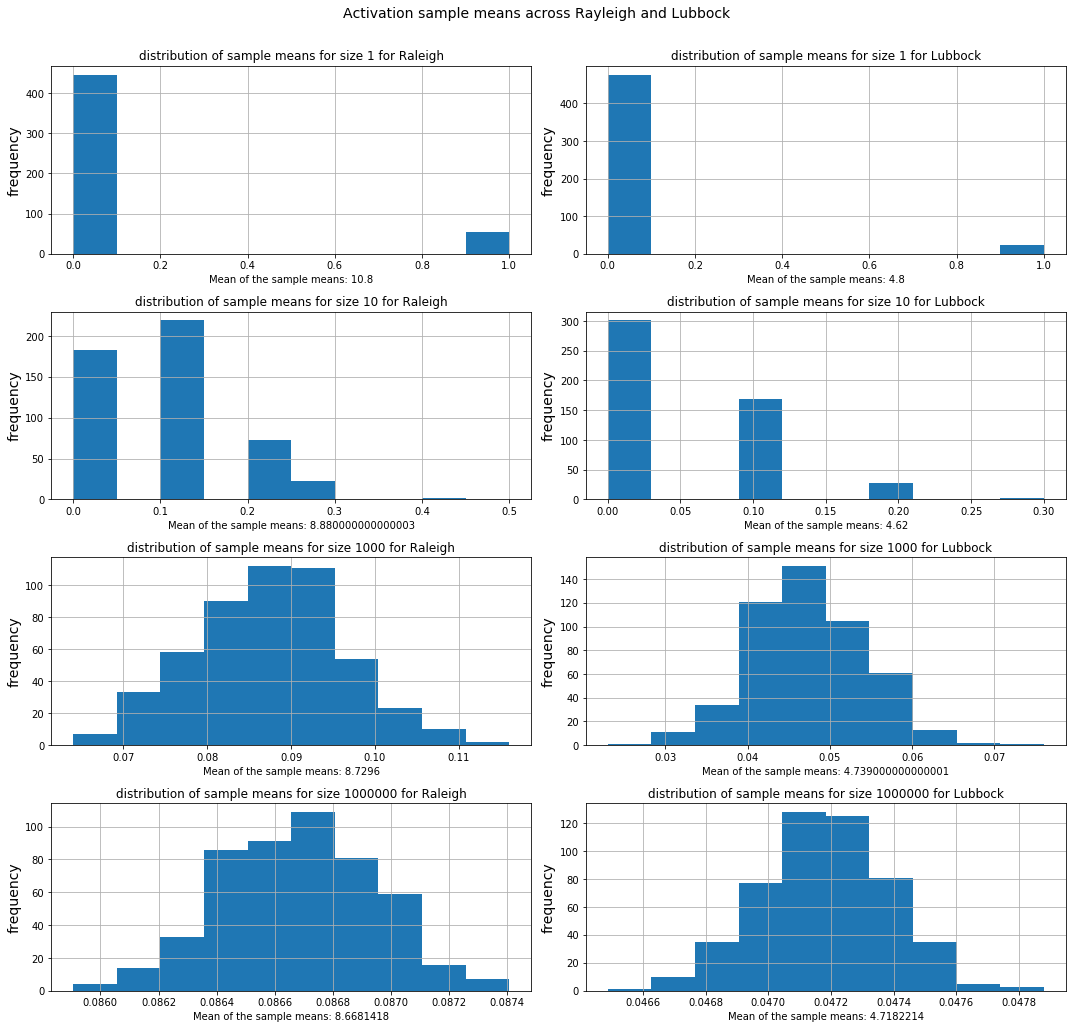

In [78]:
ax, fig = plt.subplots(4,2,figsize=(15,15))
plt.suptitle("Activation sample means across Rayleigh and Lubbock", fontsize=14)
i=1
for n in np.array([1, 10, 1000, 1*(10**6)]):
    plt.subplot(4,2,i)
    i+=1
    mean = histogram_of_sample_means(raleigh_df['offer_accepted'],n)
    plt.xlabel(f"Mean of the sample means: {mean}")
    plt.ylabel('frequency', fontsize=14)
    plt.title(f'distribution of sample means for size {n} for Raleigh')
    plt.subplot(4,2,i)
    i+=1
    mean = histogram_of_sample_means(concat_lubbock['offer_accepted'],n)
    plt.xlabel(f"Mean of the sample means: {mean}")
    plt.ylabel('frequency', fontsize=14)
    plt.title(f'distribution of sample means for size {n} for Lubbock')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The means of the Raleigh histograms converge to 8.67, which is the mean of the entire Raleigh sample.

The means of the Lubbock histograms converge to 4.71, which is the mean of the entire Lubbock sample.

Apply a statistical test to see whether the activation rate in Raleigh, NC is significantly larger than Lubbock, TX. Clearly state and validate your test's assumption. 

1. What are your hypotheses?
2. Setting your confidence level at 95%, what is the probability of an error of type I in your test? What is the probability of a type II error?
3. Are the two samples significantly different? 
4. Interpret your results. Can you declare the program as successful in increasing activation? What is the probability of wrongfully declaring it successful?

**1. Hypotheses**

$H_0: p_{raleigh} = p_{lubbock}$ (where p = activation rate of Raleigh)

Activation rate in Raleigh = activation rate in Lubbock

$H_1: p_{raleigh} > p_{lubbock}$ (where p = activation rate of Lubbock)

Activation rate in Raleigh > activation rate in Lubbock

Use the `proportions_ztestz` function from `statsmodels.stats.proportion` to perform a comparison between the activation probability in Lubbock and in Raleigh. 

In [79]:
lubbock_true = concat_lubbock['offer_accepted'].sum()
lubbock_size = concat_lubbock['offer_accepted'].count()

print(lubbock_true/lubbock_size)
print(raleigh_true/raleigh_size)

lubbock_activation_rate = lubbock_true/lubbock_size

0.04717314487632509
0.08666969972702457


In [80]:
count = np.array([raleigh_true, lubbock_true])
nobs = np.array([raleigh_size, lubbock_size])

In [81]:
ab_test = proportions_ztest(count = count, nobs = nobs, value=0, alternative='larger', prop_var=False)
ab_test

(11.315864686822128, 5.475858880145861e-30)

In [82]:
p_value_ab = ab_test[1]
p_value_ab

5.475858880145861e-30

**2. Type I and Type II errors.**

Type I error (reject the null hypothesis when it is true)

The probability of a type I error is $\alpha = 5$%.

Type II error: (fail to reject the null hypothesis when it is false)

Probability of a type II error: shown below

In [83]:
phat_std_ab = np.sqrt(lubbock_activation_rate*(1-lubbock_activation_rate)/lubbock_size)
z_value_ab = norm.ppf(0.95)
print('phat_std_ab',phat_std_ab)
print('z_value_ab',z_value_ab)

phat_std_ab 0.0019926507923131473
z_value_ab 1.6448536269514722


In [84]:
upper_ab = z_value_ab*phat_std_ab+lubbock_activation_rate
lower_ab = -z_value_ab*phat_std_ab+lubbock_activation_rate
print('upper',upper_ab)
print('lower',lower_ab)

upper 0.0504507637593091
lower 0.04389552599334108


In [85]:
raleigh_activation_rate

0.08666969972702457

In [86]:
norm(raleigh_activation_rate, phat_std_ab).cdf(upper_ab) - norm(raleigh_activation_rate, phat_std_ab).cdf(lower_ab)

3.979080115625382e-74

Thus, the probability of a type II error here is $𝛽 = 4 \cdot 10^{-74}$.

And the power of the test is $1−𝛽=1$

Note that here we have used $0.0867$ as the assumed 'new' $𝐻_0$ .

Interprest your results; do you observe a significant change in activation in Raleigh? What is the probability of wrongfully declaring the program successful?

**3. Are the two samples significantly different?**

The p value for the A/B test is $5.48\cdot 10^{-30}$. At the 5% level of significance, this shows a statistically significant difference between then two samples!

**4. Interpret your results. Can you declare the program as successful in increasing activation? What is the probability of wrongfully declaring it successful?**

Therefore, we reject the hypothesis that the Raleigh and Lubbock activation rates are the same. This supports the idea that the flyers made a significant impact on the Raleigh activation rate.

However, our probability of wrongfully declaring the program successful (the probability of a type I error) si 5%. Therefore we must be wary of declaring absolute success and we should investigate further.

# Testing for activation in sub-populations

Now that you applied the a/b test to the Lubbock and Raleigh datasets, it is now required that you make a similar comparison on different subsets of the data within various credit score and loan amount bins. To do so, let us first decide on how to segment our data.

You are asked to divide your data into 10 bins according to credit score, and then divide each of those bins into 10 bins according to loan amount. The most staightforward way of doing this is by using the `pd.qcut` function; first dividing the data into 10 quantiles of credit score and then dividing each of these quantiles into 10 according to loan amount.

Divide your datasets as above and add two columns to your data which indicate the (credit_score, loan_amnt) of the bin.

In order to split the data to bins we need use the concat of data frame raleigh_df and lubbock, otherwise we will get diffirent groups and we won't be able to compare the results

In [87]:
requested_amount_bins_dict = {}

In [88]:
concat_raleigh_lubbock = pd.concat([concat_df,concat_lubbock])
concat_raleigh_lubbock["credit_score_grouped"],credit_score_bins = pd.qcut(concat_raleigh_lubbock["credit_score"],10,labels=np.arange(10),retbins=True)
concat_raleigh_lubbock.head()

,sequence_num_raleigh,requested_amount,offered_interest_rate,offer_accepted,offer_date,credit_score,listing_term,monthly_pmt,original_state,sequence_num_lubbock,credit_score_grouped
id,,,,,,,,,,,
0000944c6eb064d675539d8deaff65acd38cecfba22862b4ce639fac845d7981,65529635d01c24822ffe6bd680ea2a0c7d44f49aa88afb...,5000.0,12.30,False,2019-12-02,791,60.0,112.0,NC,NaN,9
0003290aea2ca5f7da83d2f32d0c783998906346e998926fb5c96c6923d014b3,6ce06396232ee6df63e905b2d9e5401030570873c7c3ba...,3300.0,24.88,False,2019-01-29,645,36.0,131.0,NC,NaN,2
0005ca5ea9f8399dddee878b7c9694d618a9a1b9d0915267a0b0b38eab5f7d05,d29ac15bafd56a1444b1b06265d4c67869350f0dd86b58...,3000.0,12.94,False,2020-01-10,703,36.0,101.0,NC,NaN,5
00205f2f999895bde728aebcd83707fa204ec44e203b97bbd7dd3c902c3d2245,6061825c161146555925ce39fb27c935fb5899f39ce94b...,25000.0,13.08,False,2019-07-31,692,60.0,570.0,NC,NaN,5
002e86fa45263cfe8429dcaa1b37e8abbf57b596e6f45bd852440787276945cf,f93f7353e36814e67c17ad06878c2c9f5f810286036b9a...,3816.0,33.77,False,2020-11-23,606,36.0,170.0,NC,NaN,0


In [89]:
credit_score_bins

array([  1., 612., 637., 655., 672., 689., 705., 723., 749., 783., 849.])

In [90]:
concat_raleigh_lubbock["credit_score_grouped"].value_counts()

0    2057
4    2057
1    2044
7    2041
2    2018
6    2007
8    2000
3    1985
9    1974
5    1929
Name: credit_score_grouped, dtype: int64

In [91]:
def our_cut(x):
    cut,bins = pd.qcut(x, 10,labels=np.arange(10),retbins=True)
    requested_amount_bins_dict[len(requested_amount_bins_dict)]=bins
    return cut

concat_raleigh_lubbock["loan_amount_per_credit_score_group"] = concat_raleigh_lubbock.groupby('credit_score_grouped')['requested_amount'].transform(lambda x: our_cut(x))
concat_raleigh_lubbock["loan_amount_per_credit_score_group"].value_counts()

3    2400
1    2187
0    2094
7    2051
5    2012
8    1931
4    1910
2    1864
9    1834
6    1829
Name: loan_amount_per_credit_score_group, dtype: int64

In [92]:
def  get_credit_score_and_requested_amount_groupes(row):
    credit_id = int(row["credit_score_grouped"])
    loan_amount_id = int(row["loan_amount_per_credit_score_group"])  
    credit_score_group = (credit_score_bins[credit_id],credit_score_bins[credit_id+1])
    loan_amount__group = (requested_amount_bins_dict[credit_id][loan_amount_id], requested_amount_bins_dict[credit_id][loan_amount_id + 1])
    return credit_score_group,loan_amount__group

In [93]:
def  get_credit_score(row):
    credit_id = int(row["credit_score_grouped"])
    credit_score_group = (credit_score_bins[credit_id],credit_score_bins[credit_id+1])
    return credit_score_group

In [94]:
def  get_requested_amount_groupes(row):
    credit_id = int(row["credit_score_grouped"])
    loan_amount_id = int(row["loan_amount_per_credit_score_group"])  
    loan_amount__group = (requested_amount_bins_dict[credit_id][loan_amount_id], requested_amount_bins_dict[credit_id][loan_amount_id + 1])
    return loan_amount__group

In [95]:
concat_raleigh_lubbock[["credit_score_grouped","loan_amount_per_credit_score_group"]].value_counts()

credit_score_grouped  loan_amount_per_credit_score_group
7                     3                                     359
9                     3                                     324
4                     1                                     312
8                     3                                     306
4                     4                                     301
                                                           ... 
9                     6                                      97
2                     6                                      91
4                     5                                      72
7                     4                                      62
9                     4                                      58
Length: 100, dtype: int64

In [96]:
concat_raleigh_lubbock = concat_raleigh_lubbock[["credit_score_grouped","loan_amount_per_credit_score_group"]]
concat_raleigh_lubbock.head()

,credit_score_grouped,loan_amount_per_credit_score_group
id,,
0000944c6eb064d675539d8deaff65acd38cecfba22862b4ce639fac845d7981,9,1
0003290aea2ca5f7da83d2f32d0c783998906346e998926fb5c96c6923d014b3,2,1
0005ca5ea9f8399dddee878b7c9694d618a9a1b9d0915267a0b0b38eab5f7d05,5,0
00205f2f999895bde728aebcd83707fa204ec44e203b97bbd7dd3c902c3d2245,5,8
002e86fa45263cfe8429dcaa1b37e8abbf57b596e6f45bd852440787276945cf,0,3


In [97]:
concat_df = concat_df.join(concat_raleigh_lubbock, how='left', lsuffix='')
concat_lubbock = concat_lubbock.join(concat_raleigh_lubbock, how='left', lsuffix='')
concat_df.head()

,sequence_num_raleigh,requested_amount,offered_interest_rate,offer_accepted,offer_date,credit_score,listing_term,monthly_pmt,original_state,credit_score_grouped,loan_amount_per_credit_score_group
id,,,,,,,,,,,
0000944c6eb064d675539d8deaff65acd38cecfba22862b4ce639fac845d7981,65529635d01c24822ffe6bd680ea2a0c7d44f49aa88afb...,5000.0,12.30,False,2019-12-02,791,60.0,112.0,NC,9,1
0003290aea2ca5f7da83d2f32d0c783998906346e998926fb5c96c6923d014b3,6ce06396232ee6df63e905b2d9e5401030570873c7c3ba...,3300.0,24.88,False,2019-01-29,645,36.0,131.0,NC,2,1
0005ca5ea9f8399dddee878b7c9694d618a9a1b9d0915267a0b0b38eab5f7d05,d29ac15bafd56a1444b1b06265d4c67869350f0dd86b58...,3000.0,12.94,False,2020-01-10,703,36.0,101.0,NC,5,0
00205f2f999895bde728aebcd83707fa204ec44e203b97bbd7dd3c902c3d2245,6061825c161146555925ce39fb27c935fb5899f39ce94b...,25000.0,13.08,False,2019-07-31,692,60.0,570.0,NC,5,8
002e86fa45263cfe8429dcaa1b37e8abbf57b596e6f45bd852440787276945cf,f93f7353e36814e67c17ad06878c2c9f5f810286036b9a...,3816.0,33.77,False,2020-11-23,606,36.0,170.0,NC,0,3


In [98]:
concat_lubbock.head()

,sequence_num_lubbock,requested_amount,offered_interest_rate,offer_accepted,offer_date,credit_score,listing_term,monthly_pmt,original_state,credit_score_grouped,loan_amount_per_credit_score_group
id,,,,,,,,,,,
00081387dcef0fab60c7f9f94669cc6df140531c9e0a55c0e98b55dc5aef08d6,35357872fbcfec327a4c7665f08a98f0dc55eb19969f36...,4070.0,8.24,False,2020-07-10,735,36.0,128.0,TX,7,1
00090fdbe1fc33bf53dda546318c248cb6fe4299ad39dd9db2abd4c32ed2e152,6c98c998cb4bd242edbd55164eeed3927372264f8395b8...,5550.0,16.68,False,2020-06-02,636,36.0,197.0,TX,1,4
000aa5e29eadd0bd7e2c9649d0ed986af4848895b6a4fa7883c67dd56b5b75ac,921cda1c86bc82347ea8168a894918f8ae857cdbbdb9a5...,25000.0,7.18,False,2019-06-19,664,36.0,774.0,TX,3,8
001046cb99ae36567910bdd6fd907622cdc8aefb1689d66339fcb59353be46e2,0637e25695fcabdcec43d21364397793a169bd8b6977ed...,20000.0,6.68,False,2018-02-20,819,60.0,393.0,TX,9,7
00176f09e7f3c4c864098d84a1f07e632fcce67f4d8d1b7ae08aabd5961227f3,1448249d369054a06a82acb4003d3daee61574935da0a8...,10000.0,8.99,False,2019-09-27,780,36.0,318.0,TX,8,3


In [99]:
grouped_lubbock = concat_lubbock.groupby(["credit_score_grouped","loan_amount_per_credit_score_group"])["offer_accepted"].agg(['sum','count'])
grouped_lubbock.columns = ['sum_lubbock','count_lubbock']
grouped_raleigh = concat_df.groupby(["credit_score_grouped","loan_amount_per_credit_score_group"])["offer_accepted"].agg(['sum','count'])
grouped_raleigh.columns = ['sum_raleigh','count_raleigh']
grouped_result = grouped_lubbock.join(grouped_raleigh, how='left', lsuffix='_raleigh')

Run an a/b test on each of the bins in your data and create a $10\times 10$ table containing the $p$ value of each test.

In [100]:
def calc_p_value(row):
    count = np.array([row["sum_raleigh"],row["sum_lubbock"]]) 
    nobs = np.array([row["count_raleigh"],row["count_lubbock"]]) 
    return proportions_ztest(count = count, nobs = nobs, value=0, alternative='larger', prop_var=False)[1]
grouped_result["p_value"] = grouped_result.apply(calc_p_value,axis=1)

In [101]:
grouped_result_for_map = grouped_result.drop(["sum_raleigh","sum_lubbock","count_raleigh","count_lubbock"],axis=1).unstack(fill_value=0)

In [102]:
grouped_result

sum_lubbock  \
credit_score_grouped loan_amount_per_credit_score_group                
0                    0                                             1   
                     1                                             3   
                     2                                             1   
                     3                                             1   
                     4                                             4   
...                                                              ...   
9                    5                                            29   
                     6                                             5   
                     7                                            14   
                     8                                            10   
                     9                                            13   

                                                         count_lubbock  \
credit_score_grouped loan_amount_per_credit_score_group                  
0                    0                                             115   
                     1                                             122   
                     2                                             110   
                     3                                             121   
                     4                                             109   
...                                                                ...   
9                    5                                             183   
                     6                                              57   
                     7                                             105   
                     8                                             126   
                     9                                              93   

                                                         sum_raleigh  \
credit_score_grouped loan_amount_per_credit_score_group                
0                    0                                             9   
                     1                                            17   
                     2                                             8   
                     3                                             3   
                     4                                             9   
...                                                              ...   
9                    5                                            22   
                     6                                             9   
                     7                                            10   
                     8                                            18   
                     9                                            16   

                                                         count_raleigh  \
credit_score_grouped loan_amount_per_credit_score_group                  
0                    0                                              91   
                     1                                             100   
                     2                                              79   
                     3                                              85   
                     4                                             103   
...                                                                ...   
9                    5                                             117   
                     6                                              40   
                     7                                              88   
                     8                                             106   
                     9                                              69   

                                                          p_value  
credit_score_grouped loan_amount_per_credit_score_group            
0                    0                                   0.001387  
                     1                               

In [103]:
grouped_result_for_map

p_value                                \
loan_amount_per_credit_score_group         0         1         2         3   
credit_score_grouped                                                         
0                                   0.001387  0.000083  0.001668  0.083162   
1                                   0.000894  0.249587  0.241041  0.344056   
2                                   0.134296  0.093373  0.495051  0.099481   
3                                   0.178387  0.038137  0.182196  0.006407   
4                                   0.215514  0.053161  0.189042  0.040173   
5                                   0.000222  0.043176  0.002623  0.050018   
6                                   0.108647  0.957770  0.308379  0.346092   
7                                   0.268435  0.697357  0.013666  0.102015   
8                                   0.291921  0.752341  0.133707  0.031665   
9                                   0.446284  0.065872  0.738245  0.201314   

                                                                            \
loan_amount_per_credit_score_group         4         5         6         7   
credit_score_grouped                                                         
0                                   0.062114  0.000868  0.000074  0.062155   
1                                   0.007952  0.011349  0.016454  0.230610   
2                                   0.318508  0.007938  0.138716  0.049993   
3                                   0.207943  0.130719  0.358192  0.074957   
4                                   0.023232  0.893830  0.192816       NaN   
5                                   0.748927  0.194644  0.186542  0.157437   
6                                   0.389232  0.753335  0.266041  0.170263   
7                                   0.407125  0.117820  0.004069  0.157307   
8                                   0.344065  0.108880  0.936123  0.061570   
9                                   0.663714  0.253055  0.029118  0.660202   

                                                        
loan_amount_per_credit_score_group         8         9  
credit_score_grouped                                    
0                                   0.000003  0.006765  
1                                   0.203381  0.190078  
2                                   0.044686  0.022403  
3                                   0.379395  0.495278  
4                                   0.289970  0.358625  
5                                   0.079624  0.009442  
6                                   0.160812  0.235747  
7                                   0.001983  0.463425  
8                                   0.207089  0.465809  
9                                   0.017577  0.065266

Use the [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function to represent your table as a heatmap. You can also use it on a suitable table of boolean values to get a more robus representation of which experiments turned out significant.

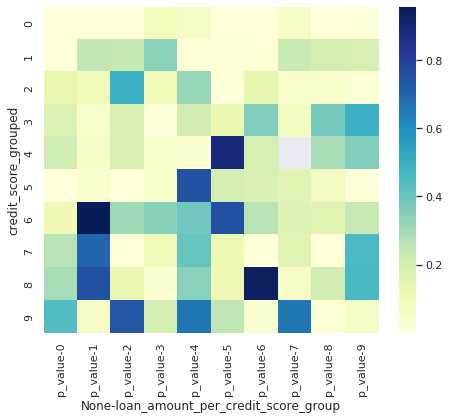

In [104]:
np.random.seed(42)
sns.set_theme()
plt.subplots(figsize=(7.5, 6))
ax = sns.heatmap(grouped_result_for_map, cmap="YlGnBu")

Understanding this heatmap:
- Credit score (vertical axis): the lower credit scores are higher up the axis
- Loan amount (horizontal axis): the higher loan loan amounts are further to the right on the axis
- The lighter the square, the lower the p-value
- The grey square is a NaN value. This bin had no borrowers accepting a loan

What is the probability of falsely rejecting the null hypothesis in each cell? What is the probability of falsely rejecting the null hypothesis in at least one of the cells (i.e. what is the **family wise error rate**)?

In other words, given that we made $m$ experiments, with confidence level $\alpha$, what is the probabilty $\mathbb{P}\left(\bigcup_i X_i \le q_{\alpha}\right)$? 

_Note_: you may assume that sampling from different bins are independent.

**Family wise error rate**

Let X be the number of times a null hypothesis is rejected.

It is distributed binomially with probability $\alpha = p = 0.05$.

$Pr(X\geq1) = 1 - Pr(X=0)$

$= 1-0.95^{100}$

$= 0.994$

## Bonferroni correction 

One way of assuring that your FWER remains below $\alpha=0.05$ is to apply a <a href="https://en.wikipedia.org/wiki/Bonferroni_correction">**Bonferroni correction**</a>. This means that we set the signficance level of each individual test to $\alpha/m$, where $m=100$ is the number of tests (see, e.g., Wikipedia for an explanation). 

Use a Bonferroni correction on your segmented a/b test and output a $10\times10$ table of boolean values, indicating which test gave a significant result under this correction.

In [105]:
grouped_result_for_map

p_value                                \
loan_amount_per_credit_score_group         0         1         2         3   
credit_score_grouped                                                         
0                                   0.001387  0.000083  0.001668  0.083162   
1                                   0.000894  0.249587  0.241041  0.344056   
2                                   0.134296  0.093373  0.495051  0.099481   
3                                   0.178387  0.038137  0.182196  0.006407   
4                                   0.215514  0.053161  0.189042  0.040173   
5                                   0.000222  0.043176  0.002623  0.050018   
6                                   0.108647  0.957770  0.308379  0.346092   
7                                   0.268435  0.697357  0.013666  0.102015   
8                                   0.291921  0.752341  0.133707  0.031665   
9                                   0.446284  0.065872  0.738245  0.201314   

                                                                            \
loan_amount_per_credit_score_group         4         5         6         7   
credit_score_grouped                                                         
0                                   0.062114  0.000868  0.000074  0.062155   
1                                   0.007952  0.011349  0.016454  0.230610   
2                                   0.318508  0.007938  0.138716  0.049993   
3                                   0.207943  0.130719  0.358192  0.074957   
4                                   0.023232  0.893830  0.192816       NaN   
5                                   0.748927  0.194644  0.186542  0.157437   
6                                   0.389232  0.753335  0.266041  0.170263   
7                                   0.407125  0.117820  0.004069  0.157307   
8                                   0.344065  0.108880  0.936123  0.061570   
9                                   0.663714  0.253055  0.029118  0.660202   

                                                        
loan_amount_per_credit_score_group         8         9  
credit_score_grouped                                    
0                                   0.000003  0.006765  
1                                   0.203381  0.190078  
2                                   0.044686  0.022403  
3                                   0.379395  0.495278  
4                                   0.289970  0.358625  
5                                   0.079624  0.009442  
6                                   0.160812  0.235747  
7                                   0.001983  0.463425  
8                                   0.207089  0.465809  
9                                   0.017577  0.065266

In [106]:
bonferroni_filter = grouped_result_for_map[grouped_result_for_map < 0.05/100]
bonferroni_filter.fillna("Do not reject")

p_value                 \
loan_amount_per_credit_score_group              0              1   
credit_score_grouped                                               
0                                   Do not reject       0.000083   
1                                   Do not reject  Do not reject   
2                                   Do not reject  Do not reject   
3                                   Do not reject  Do not reject   
4                                   Do not reject  Do not reject   
5                                        0.000222  Do not reject   
6                                   Do not reject  Do not reject   
7                                   Do not reject  Do not reject   
8                                   Do not reject  Do not reject   
9                                   Do not reject  Do not reject   

                                                                  \
loan_amount_per_credit_score_group              2              3   
credit_score_grouped                                               
0                                   Do not reject  Do not reject   
1                                   Do not reject  Do not reject   
2                                   Do not reject  Do not reject   
3                                   Do not reject  Do not reject   
4                                   Do not reject  Do not reject   
5                                   Do not reject  Do not reject   
6                                   Do not reject  Do not reject   
7                                   Do not reject  Do not reject   
8                                   Do not reject  Do not reject   
9                                   Do not reject  Do not reject   

                                                                  \
loan_amount_per_credit_score_group              4              5   
credit_score_grouped                                               
0                                   Do not reject  Do not reject   
1                                   Do not reject  Do not reject   
2                                   Do not reject  Do not reject   
3                                   Do not reject  Do not reject   
4                                   Do not reject  Do not reject   
5                                   Do not reject  Do not reject   
6                                   Do not reject  Do not reject   
7                                   Do not reject  Do not reject   
8                                   Do not reject  Do not reject   
9                                   Do not reject  Do not reject   

                                                                  \
loan_amount_per_credit_score_group              6              7   
credit_score_grouped                                               
0                                        0.000074  Do not reject   
1                                   Do not reject  Do not reject   
2                                   Do not reject  Do not reject   
3                                   Do not reject  Do not reject   
4                                   Do not reject  Do not reject   
5                                   Do not reject  Do not reject   
6                                   Do not reject  Do not reject   
7                                   Do not reject  Do not reject   
8                                   Do not reject  Do not reject   
9                                   Do not reject  Do not reject   

                                                                  
loan_amount_per_credit_score_group              8              9  
credit_score_grouped                                              
0                                        0.000003  Do not reject  
1                                   Do not reject  Do not reject  
2                                   Do not reject  Do not reject  
3                                   Do not reject  Do not reject  
4                                

How many of your tests came out significant under this correction?

In [107]:
bonferroni_filter.count().sum()

4

Visualize your result using the [seaborn.heatmap]() function and compare to the previous heatmap.

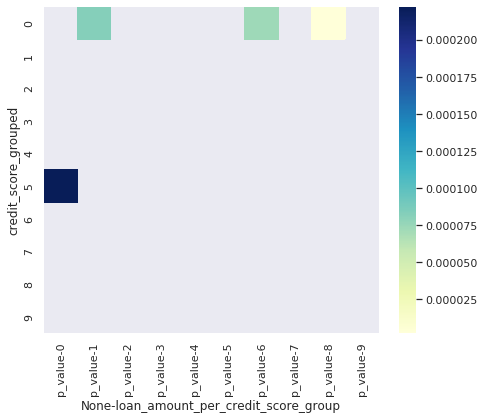

In [108]:
sns.set_theme()
plt.subplots(figsize=(7.5, 6))
ax = sns.heatmap(bonferroni_filter, cmap="YlGnBu")

The details of which groups these squares belong to are shown below.

In [109]:
stack_df = bonferroni_filter.stack().reset_index()
stack_df

,credit_score_grouped,loan_amount_per_credit_score_group,p_value
0,0,1,0.000083
1,0,6,0.000074
2,0,8,0.000003
3,5,0,0.000222


In [110]:
stack_df["credit_score_group"] = stack_df.apply(get_credit_score,axis=1)
stack_df["requested_amount_groupe"] = stack_df.apply(get_requested_amount_groupes,axis=1)
stack_df[["credit_score_group","requested_amount_groupe"]]

,credit_score_group,requested_amount_groupe
0,"(1.0, 612.0)","(2409.0000000000005, 3000.0)"
1,"(1.0, 612.0)","(6582.000000000002, 8000.0)"
2,"(1.0, 612.0)","(10000.0, 13238.800000000003)"
3,"(689.0, 705.0)","(1000.0, 3500.0)"


In [111]:
stack_df

,credit_score_grouped,loan_amount_per_credit_score_group,p_value,credit_score_group,requested_amount_groupe
0,0,1,0.000083,"(1.0, 612.0)","(2409.0000000000005, 3000.0)"
1,0,6,0.000074,"(1.0, 612.0)","(6582.000000000002, 8000.0)"
2,0,8,0.000003,"(1.0, 612.0)","(10000.0, 13238.800000000003)"
3,5,0,0.000222,"(689.0, 705.0)","(1000.0, 3500.0)"


## BH correction 

The Bonferroni correction is often criticized for being too restrictive, as you probably noticed in the last subsection. A more commonly used method for correcting $\alpha$ values is the Benjamini-Hochberg method. You can <a href="https://www.youtube.com/watch?v=K8LQSvtjcEo">check out the quest</a> for a nice explanation about it.

Start by arranging the $p$-values of your original test as a series and listing them in ascending order. You can use the `pd.DataFrame.stack` and `pd.Series.sort_values` methods.

In [112]:
one_hundred_p_values = grouped_result["p_value"] #pd.Series(np.sort(p_grid.flatten()), name="one_hundred_p_values")
one_hundred_p_values = one_hundred_p_values.sort_values()

In [113]:
one_hundred_p_values = one_hundred_p_values.reset_index()

Plot your sorted $p$-values

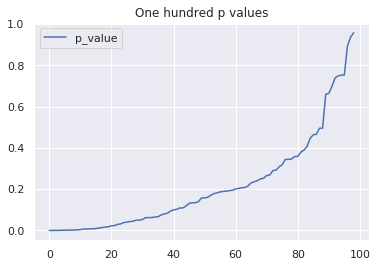

In [114]:
one_hundred_p_values.plot(title = "One hundred p values")
plt.show()

For each entry of the new series, compute the value compute the value $\frac{i}{m}\cdot\alpha$, where $i$ is the ordinal place of the entry (i.e. 1,2,...len(series)), $m=100$ and $\alpha=0.05$ as above. Add a plot of these values to your $p$-values plot.

Find the largest index $i$ for which the $p$-value in the $i$-th place in the series is smaller than $\frac{i}{m}\cdot\alpha$. That is- the last index in the plot you just created where the $p$-values line lies below the _adjusted_-$\alpha$ line.

In [115]:
one_hundred_p_values = one_hundred_p_values.rename(columns={'one_hundred_p_values': 'p_value'})

In [116]:
one_hundred_p_values['i/m*a']=(one_hundred_p_values['p_value'].index)/100*0.05

In [117]:
one_hundred_p_values["p_value_smaller_than_i/m*a"]=one_hundred_p_values["p_value"]<one_hundred_p_values["i/m*a"]
one_hundred_p_values

,credit_score_grouped,loan_amount_per_credit_score_group,p_value,i/m*a,p_value_smaller_than_i/m*a
0,0,8,0.000003,0.0000,False
1,0,6,0.000074,0.0005,True
2,0,1,0.000083,0.0010,True
3,5,0,0.000222,0.0015,True
4,0,5,0.000868,0.0020,True
...,...,...,...,...,...
95,6,5,0.753335,0.0475,False
96,4,5,0.893830,0.0480,False
97,8,6,0.936123,0.0485,False
98,6,1,0.957770,0.0490,False


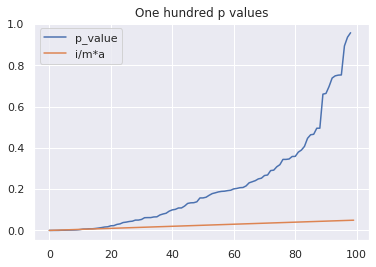

In [118]:
one_hundred_p_values.plot(title = "One hundred p values")
plt.show()

In [119]:
reject_point = one_hundred_p_values['p_value_smaller_than_i/m*a'][one_hundred_p_values['p_value_smaller_than_i/m*a']==True].last_valid_index()
print(reject_point)

10


Reject the null hypothesis for all test before and including this index, and accept it for all others. Reformat your table into a $10\times 10$ dataframe; for which bins did we get a significant result in the corrected test?

In [133]:
one_hundred_p_values['reject_H0'] = one_hundred_p_values.index<=reject_point
print('These are the values for which we should reject the null hypothesis')
BH = one_hundred_p_values[one_hundred_p_values['reject_H0']==True]
BH['p_value']

These are the values for which we should reject the null hypothesis


0     0.000003
1     0.000074
2     0.000083
3     0.000222
4     0.000868
5     0.000894
6     0.001387
7     0.001668
8     0.001983
9     0.002623
10    0.004069
Name: p_value, dtype: float64

In [134]:
Bh_grouped_result_for_map = grouped_result_for_map[grouped_result_for_map.isin(BH["p_value"].array)]

Visualize your result using the [seaborn.heatmap]() function and compare to the previous heatmap.

In [135]:
#bonferroni_filter.stack().reset_index().columns

In [136]:
def  get_credit_score_and_requested_amount_groupes1(row):
    credit_id = int(row["credit_score_grouped"])
    loan_amount_id = int(row["loan_amount_per_credit_score_group"])  
    credit_score_group = (credit_score_bins[credit_id],credit_score_bins[credit_id+1])
    loan_amount__group = (requested_amount_bins_dict[credit_id][loan_amount_id], requested_amount_bins_dict[credit_id][loan_amount_id + 1])
    return credit_score_group,loan_amount__group

In [137]:
def  get_credit_score(row):
    credit_id = int(row["credit_score_grouped"])
    credit_score_group = (credit_score_bins[credit_id],credit_score_bins[credit_id+1])
    return credit_score_group

In [138]:
def  get_requested_amount_groupes(row):
    credit_id = int(row["credit_score_grouped"])
    loan_amount_id = int(row["loan_amount_per_credit_score_group"])  
    loan_amount__group = (requested_amount_bins_dict[credit_id][loan_amount_id], requested_amount_bins_dict[credit_id][loan_amount_id + 1])
    return loan_amount__group

In [154]:
BH["credit_score_group"] = BH.apply(get_credit_score,axis=1)
BH["requested_amount_group"] = BH.apply(get_requested_amount_groupes,axis=1)
BH[["credit_score_group","requested_amount_group"]]

,credit_score_group,requested_amount_group
0,"(1.0, 612.0)","(10000.0, 13238.800000000003)"
1,"(1.0, 612.0)","(6582.000000000002, 8000.0)"
2,"(1.0, 612.0)","(2409.0000000000005, 3000.0)"
3,"(689.0, 705.0)","(1000.0, 3500.0)"
4,"(1.0, 612.0)","(5291.0, 6582.000000000002)"
5,"(612.0, 637.0)","(893.0, 2895.3)"
6,"(1.0, 612.0)","(500.0, 2409.0000000000005)"
7,"(1.0, 612.0)","(3000.0, 3591.2000000000007)"
8,"(723.0, 749.0)","(21800.0, 29588.0)"
9,"(689.0, 705.0)","(5000.0, 6025.4000000000015)"


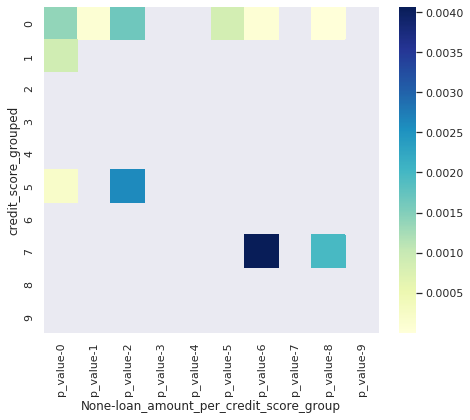

In [140]:
sns.set_theme()
plt.subplots(figsize=(7.5, 6))
ax = sns.heatmap(Bh_grouped_result_for_map, cmap="YlGnBu")

The groups that these squares come from are shown in the table above.

### Validating your results

You can validate your results (for both corrections) using the <a href= "https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html">`statsmodels.stats.multitest.multipletests`</a> package.

In [128]:
from statsmodels.stats.multitest import multipletests

mt = multipletests(grouped_result.p_value.array, method='fdr_bh', alpha=0.05)
#bonferroni

In [129]:
mt[0].sum()

11

This validates our BH correction.

In [130]:
mt = multipletests(grouped_result.p_value.array, method='bonferroni', alpha=0.05)


In [131]:
mt[0].sum()

4

This vvalidates our Bonferroni correction.

### Extra charts

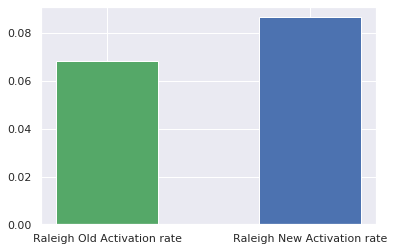

In [151]:
ax = plt.subplot(111)
ax.bar("Raleigh Old Activation rate", 0.0685, width=0.5, color='g', align='center')
ax.bar("Raleigh New Activation rate", raleigh_activation_rate, width=0.5, color='b', align='center')
plt.show()

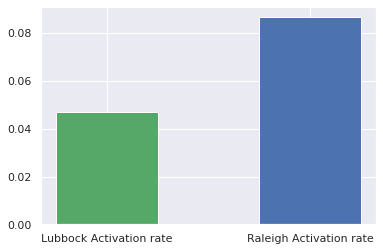

In [152]:
ax = plt.subplot(111)
ax.bar("Lubbock Activation rate", lubbock_activation, width=0.5, color='g', align='center')
ax.bar("Raleigh Activation rate", raleigh_activation_rate, width=0.5, color='b', align='center')
plt.show()